# 신경망 적용해보기

## MNIST
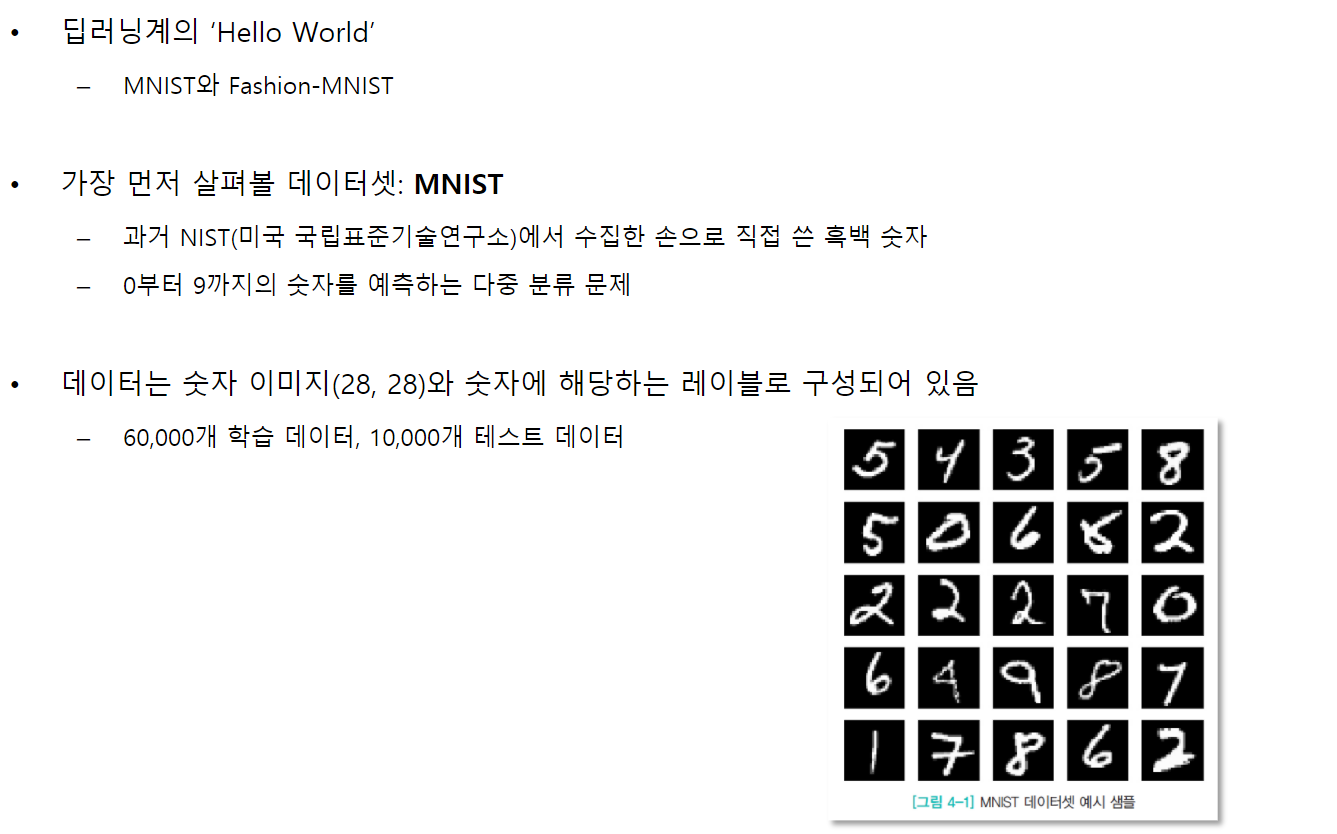

### MNIST 데이터셋 다운로드
- 케라스에서 제공하는 데이터셋은 전부 tf.keras.datasets를 통해 접근 가능   
- load_data() 함수는 (x_train, y_train), (x_test, y_test) 형태로 분할해서 제공


In [1]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


### 데이터 형태 확인
- 데이터, 레이블가 어떻게 구성되어 있는지 확인해보는 과정은
필수!
- 제공되는 코드를 통해 데이터를 그려보세요.


In [3]:
# 훈련 데이터
print('#######훈련데이터#######\n',x_train.shape, y_train.shape)
print(y_train)

print('\n')

# 테스트 데이터
print('#######테스트데이터#######\n',x_test.shape, y_test.shape)
print(y_test)

#######훈련데이터#######
 (60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


#######테스트데이터#######
 (10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


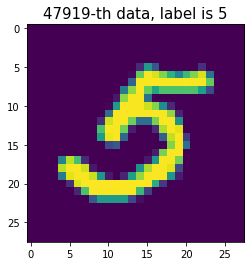

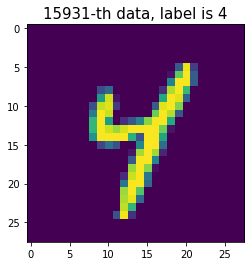

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 2
# 0~59999의 범위에서 무작위로 2개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx,label), fontsize = 15)

Text(0.5, 1.0, '15931-th data, label is 7')

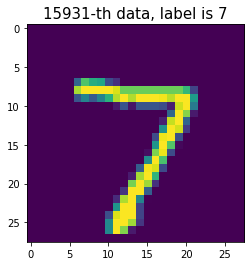

In [ ]:
# 마지막에 예측해볼 데이터
img = x_test[0,:]
label = y_test[0]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx,label), fontsize = 15)

In [5]:
for i in x_train[4]:
  for j in i:
    print('{:4}'.format(j), end="")
  print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0

#### 모델 검증을 위해 검증 데이터셋을 만듭니다
- train_test_split() 함수 사용
- test_size: 테스트 데이터셋 비율
- random_state: 재생산성


In [6]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

print(f'훈련 데이터:{x_train.shape}, 레이블:{y_train.shape}')
print(f'검증 데이터:{x_val.shape}, 레이블:{y_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


#### 학습을 위해 전처리를 수행해야 함
- 255로 나눠주어 0~1사이로 스케일 조정
- 신경망은 스케일에 매우 민감!
- Dense 층 사용을 위해 784차원의 1차원 배열로 변환   
 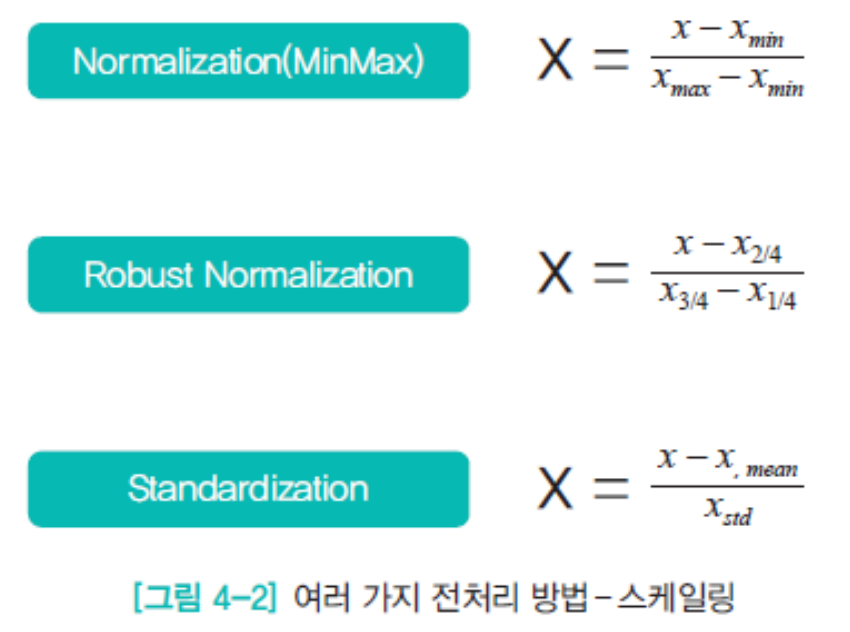


In [7]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다.

(42000, 784)


####  모델 입력을 위한 레이블 전처리

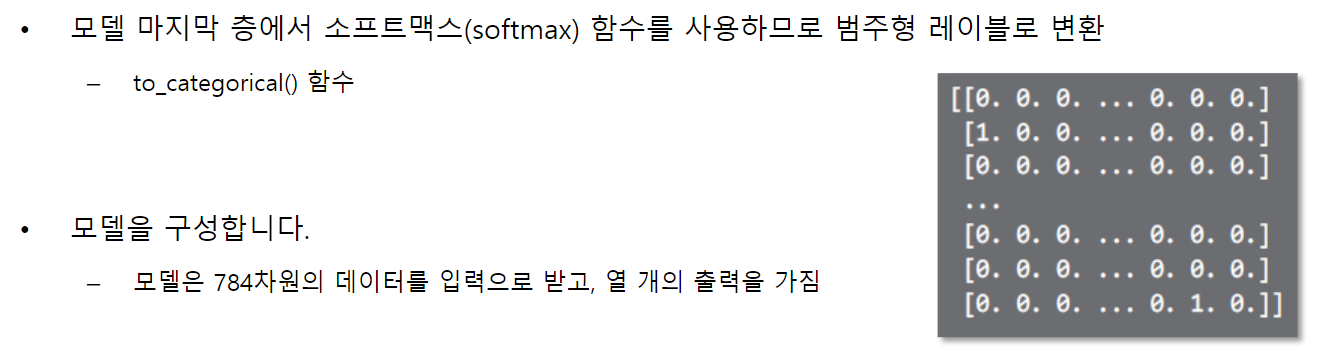

In [8]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 모델 구성하기

##### 시그모이드, 소프트맥스 함수
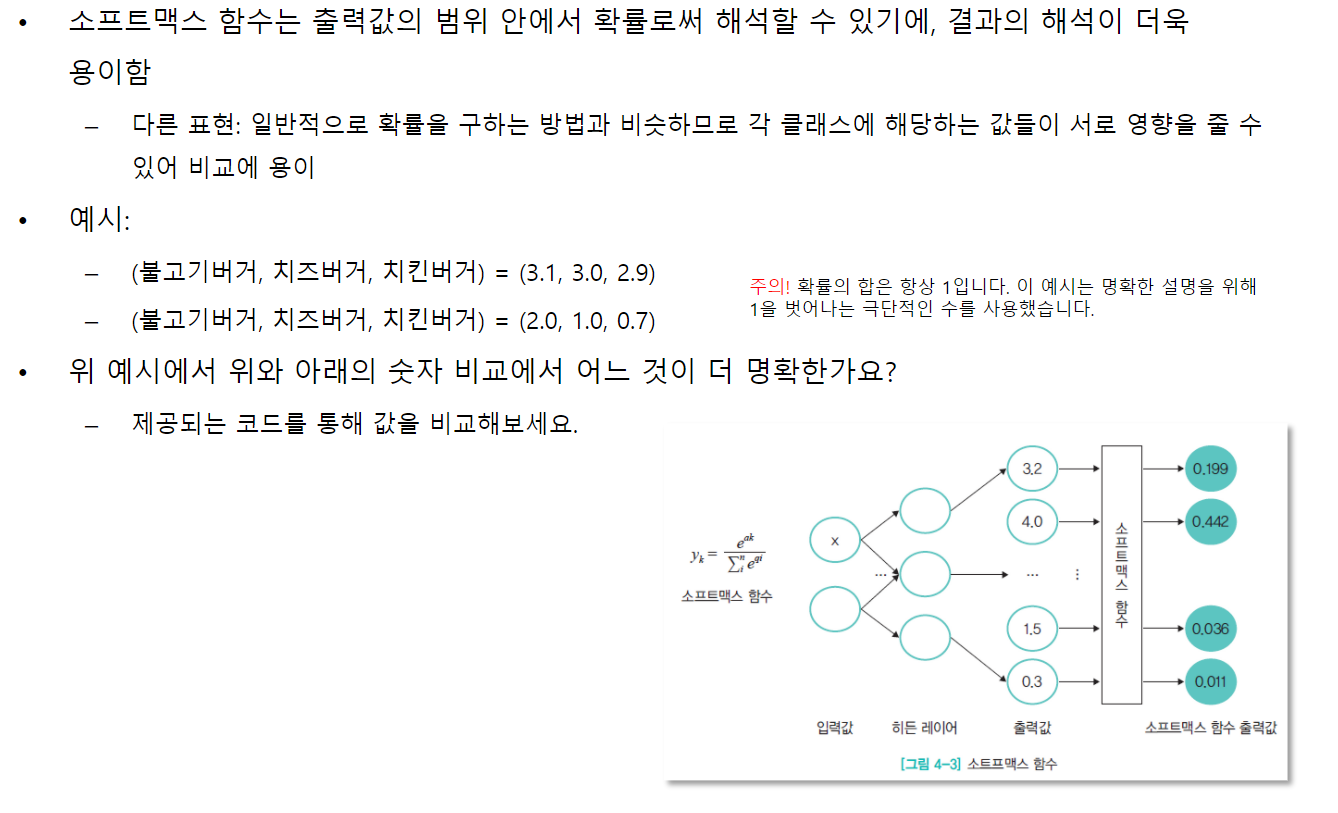

In [ ]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

#### 학습과정 설정하기

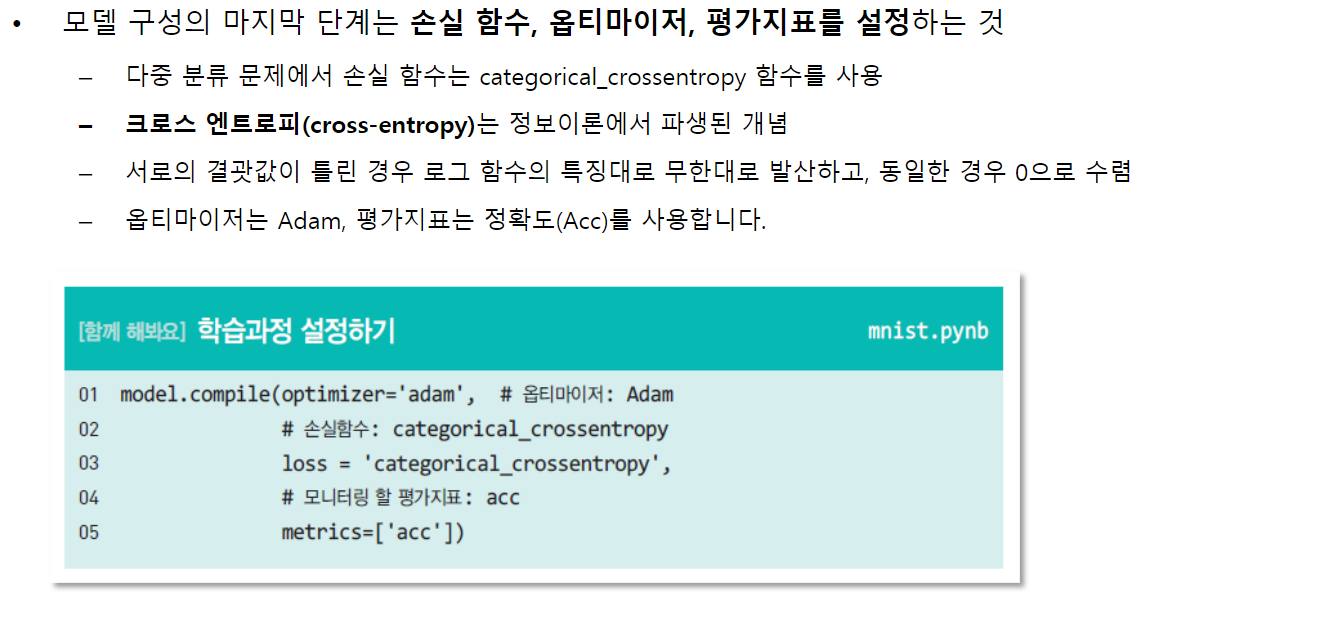

In [10]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

#### 모델 학습하기
- validation_data에 검증 데이터셋을 전달하고, 128 배치크기를 사용하며, 전체 데이터를 30회 반복

In [11]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.5022 - acc: 0.8596 - val_loss: 0.2438 - val_acc: 0.9324
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2019 - acc: 0.9417 - val_loss: 0.1922 - val_acc: 0.9438
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1518 - acc: 0.9568 - val_loss: 0.1598 - val_acc: 0.9535
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1238 - acc: 0.9646 - val_loss: 0.1359 - val_acc: 0.9597
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1033 - acc: 0.9707 - val_loss: 0.1288 - val_acc: 0.9621
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0889 - acc: 0.9740 - val_loss: 0.1172 - val_acc: 0.9653
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0776 - acc: 0.9779 - val_loss: 0.1123 - val_acc: 0.9670
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

#### 학습 결과 그리기
- model.fit() 함수는 History 객체를 전달합니다. 이를 활용하여 학습 과정을 손쉽게 모니터링 할 수 있음

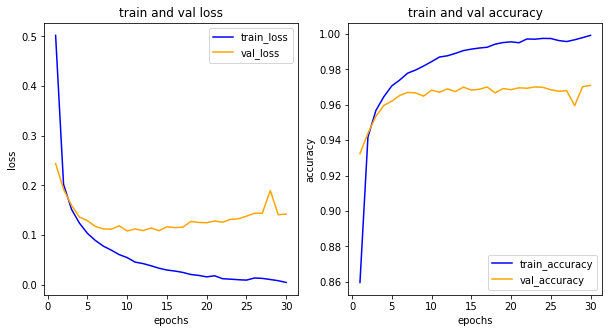

In [12]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

- 두 그래프가 어디서부터 벌어지나요?
  - 과대적합 문제가 나타난 것
  - 데이터 특성, 모델 구조 등을 수정해보고 재학습
  - 벌어지기 전까지의 모델을 사용하여 결과를 확인하고 이를 저장 및 기록


#### 모델 평가

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1311 - acc: 0.9733


[0.13106057047843933, 0.9732999801635742]

#### 학습된 모델을 통해 값 예측하기

In [ ]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[4.4285377e-11 2.9526480e-15 3.1188638e-10 2.0295870e-07 1.7373303e-21
 7.8306136e-14 3.5985347e-19 9.9999976e-01 6.9941722e-12 3.9425721e-08]


#### 예측값 그려서 확인해보기

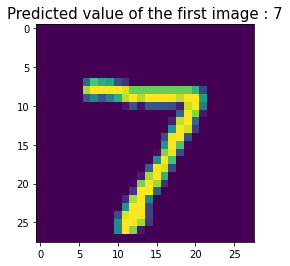

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

#### 모델 평가 방법 1 - 혼동 행렬

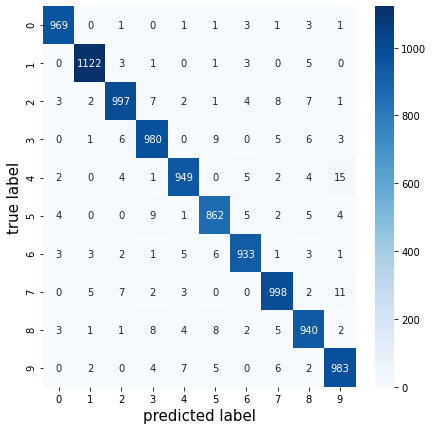

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

#### 모델 평가 방법 2 - 분류 보고서

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

